In [20]:
# fraud_detection.ipynb

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')


In [21]:
# Step 2: Load Data
df = pd.read_csv('fraudTest.csv')  # Replace with actual file path

df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [22]:
print(df.columns.tolist())


['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


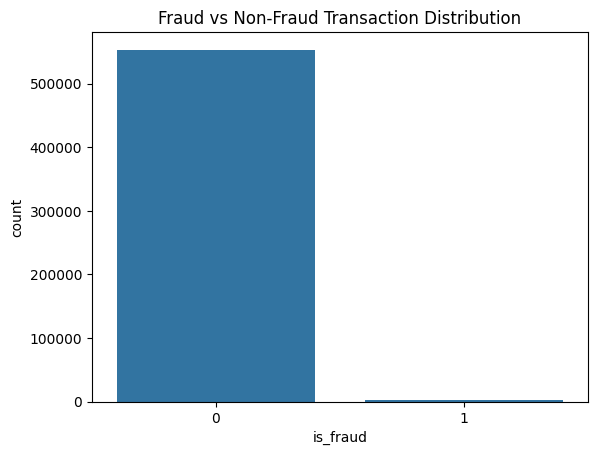

In [23]:
# Check class distribution
df['is_fraud'].value_counts(normalize=True) * 100

# Plot class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_fraud', data=df)
plt.title('Fraud vs Non-Fraud Transaction Distribution')
plt.show()


In [24]:
# Drop irrelevant columns for modeling
drop_cols = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 
             'gender', 'street', 'city', 'state', 'zip', 'dob', 
             'job', 'trans_num']

df = df.drop(columns=drop_cols)

# Define X and y
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


In [27]:
# Handle categorical features
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category').cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
# Use only 50,000 rows for training/testing
df_sampled = df.sample(n=50000, random_state=42)

# Redefine X and y from this smaller dataset
X = df_sampled.drop('is_fraud', axis=1)
y = df_sampled['is_fraud']


In [35]:
# Encode categorical
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category').cat.codes

# Train-test split & scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


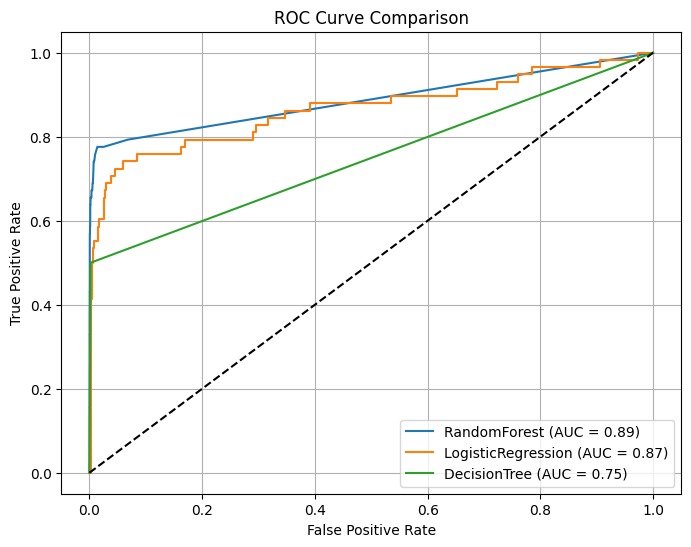

In [36]:
# Sample your data
df_sampled = df.sample(n=50000, random_state=42)

# Features and target
X = df_sampled.drop('is_fraud', axis=1)
y = df_sampled['is_fraud']

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category').cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier()
}

from sklearn.metrics import roc_auc_score, roc_curve

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    results[name] = {
        'y_pred': y_pred,
        'y_proba': y_proba,
        'roc_auc': roc_auc_score(y_test, y_proba)
    }

# ✅ Now plotting ROC Curve correctly
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_proba'])  # ← y_test size matches
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['roc_auc']:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()


In [37]:
df_sampled['is_fraud'].value_counts(normalize=True)


is_fraud
0    0.9961
1    0.0039
Name: proportion, dtype: float64

In [40]:
print(df_sampled.columns)


Index(['cc_num', 'merchant', 'category', 'amt', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [42]:
for name, res in results.items():
    print(f"{name} → ROC AUC: {res['roc_auc']:.4f}")


RandomForest → ROC AUC: 0.8875
LogisticRegression → ROC AUC: 0.8651
DecisionTree → ROC AUC: 0.7490


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

for name, res in results.items():
    print(f"🔎 {name}")
    print(confusion_matrix(y_test, res['y_pred']))
    print(classification_report(y_test, res['y_pred']))


🔎 RandomForest
[[14938     4]
 [   36    22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14942
           1       0.85      0.38      0.52        58

    accuracy                           1.00     15000
   macro avg       0.92      0.69      0.76     15000
weighted avg       1.00      1.00      1.00     15000

🔎 LogisticRegression
[[14933     9]
 [   58     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14942
           1       0.00      0.00      0.00        58

    accuracy                           1.00     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.99      1.00      0.99     15000

🔎 DecisionTree
[[14912    30]
 [   29    29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14942
           1       0.49      0.50      0.50        58

    accuracy                          

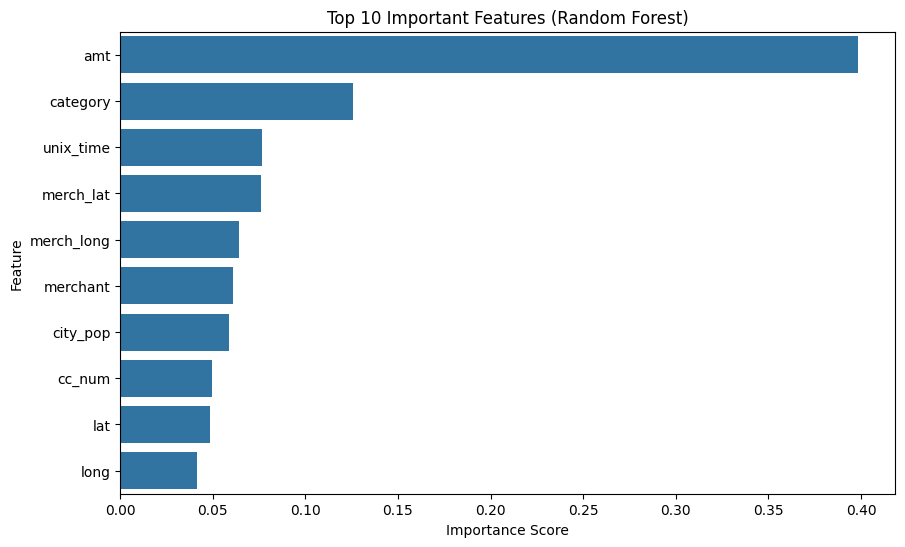

In [44]:
import seaborn as sns

rf = models['RandomForest']
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feat_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
